## Generación de Datos Sintéticos

#### generamos 1000 muestras de datos con 20 características donde 10 son igual a 0. Agregamos ruido gaussiano a los datos y finalmente terminamos con datos de x e y.



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos sintéticos
np.random.seed(0) # Para reproducibilidad
true_coeffs = np.random.uniform(-10, 10, size=20) # Coeficientes verdaderos
true_coeffs[5:15] = 0 # Hacer los primeros 10 coeficientes cero

n_samples = 1000
n_features = 20
X = np.random.rand(n_samples, n_features) * 10 # Características entre 0 y 10
noise = np.random.normal(0,5, size=n_samples) # Ruido gaussiano
y = X @ true_coeffs + noise # Variable objetivo
y_true = X @ true_coeffs # Variable objetivo sin ruido

## Simulación
#### se llevan a cabo 500 simulaciones para ridge y lasso, los valores de predicción y los pesos son almacenados.


In [ ]:
n_simulations = 200
alphas = np.logspace(-3, 4, 100) # en total 100 valores de alpha para Ridge y Lasso

# Almacenar resultados
all_predictions_ridge = {alpha:[] for alpha in alphas}
all_predictions_lasso = {alpha:[] for alpha in alphas}
coeffs_ridge = {alpha:[] for alpha in alphas}
coeffs_lasso = {alpha:[] for alpha in alphas}

print("iniciando simulaciones...")
for i in range(n_simulations):
    # Se generan nuevos datos con ruido en cada simulación
    X_sim = np.random.rand(n_samples, n_features) * 10
    noise_sim = np.random.normal(0, 5, size=n_samples) # ruido con media 0 y desviación estándar 5
    y_sim = X_sim @ true_coeffs + noise_sim
    # y_true_sim = X_sim @ true_coeffs # Esta línea no es estrictamente necesaria para el resto del código

    for alpha in alphas:
        # Modelo Ridge
        ridge = Ridge(alpha=alpha, max_iter=10000)
        ridge.fit(X_sim, y_sim)
        # Predecimos sobre el CONJUNTO DE REFERENCIA FIJO 'X'
        all_predictions_ridge[alpha].append(ridge.predict(X))
        coeffs_ridge[alpha].append(ridge.coef_)

        # Modelo Lasso
        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X_sim, y_sim)
        # Predecimos sobre el CONJUNTO DE REFERENCIA FIJO 'X'
        all_predictions_lasso[alpha].append(lasso.predict(X))
        coeffs_lasso[alpha].append(lasso.coef_)

print("simulaciones finalizadas.")

iniciando simulaciones...
simulaciones finalizadas.


## Calculo de Sesgo y Varianza
#### se calcula el sesgo y la varianza para los modelos ridge y lasso a partir de las predicciones obtenidas en la simulación anterior.

In [34]:
bias_sq_ridge, variance_ridge, mse_ridge = [], [], []
bias_sq_lasso, variance_lasso, mse_lasso = [], [], []

for alpha in alphas:
    # Para Ridge
    avg_predictions_ridge = np.mean(all_predictions_ridge[alpha], axis=0)
    bias_sq_r = np.mean((avg_predictions_ridge - y_true)**2)
    variance_r = np.mean(np.var(all_predictions_ridge[alpha], axis=0))
    mse_r = np.mean((np.array(all_predictions_ridge[alpha]) - y_true)**2) # Forma más directa de calcular MSE
    
    bias_sq_ridge.append(bias_sq_r)
    variance_ridge.append(variance_r)
    mse_ridge.append(mse_r)

    # Para Lasso
    avg_predictions_l = np.mean(all_predictions_lasso[alpha], axis=0) # Corregido
    bias_sq_l = np.mean((avg_predictions_l - y_true)**2) # Corregido
    variance_l = np.mean(np.var(all_predictions_lasso[alpha], axis=0))
    mse_l = np.mean((np.array(all_predictions_lasso[alpha]) - y_true)**2) # Forma más directa de calcular MSE

    bias_sq_lasso.append(bias_sq_l)
    variance_lasso.append(variance_l)
    mse_lasso.append(mse_l)

## visualización de Resultados
#### se crean gráficos para comparar los resultados de sesgo y varianza entre los modelos ridge y lasso.

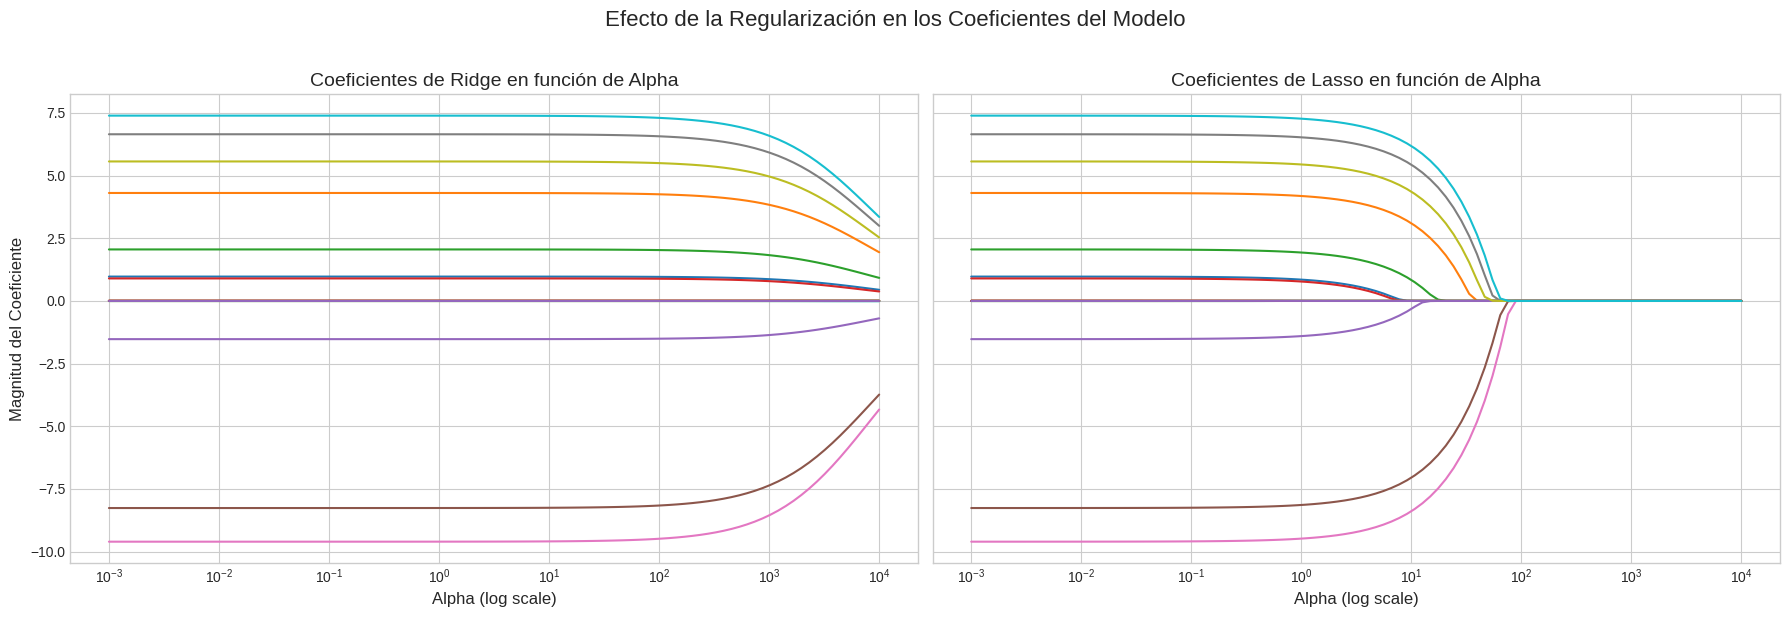

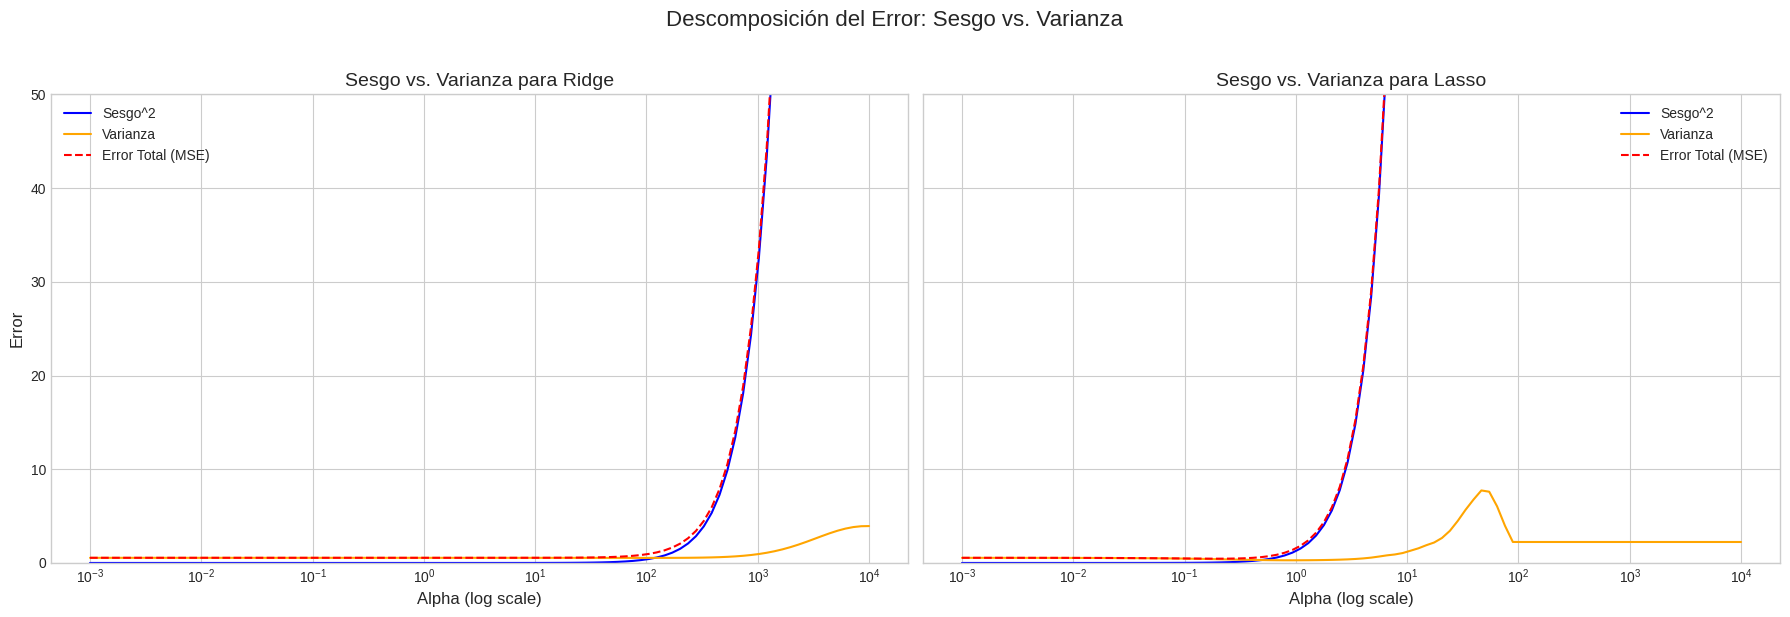

In [37]:
plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico 1: Magnitud de los coeficientes vs. Alpha
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Coeficientes de Ridge
avg_coeffs_r = np.array([np.mean(coeffs_ridge[alpha], axis=0) for alpha in alphas])
ax1.plot(alphas, avg_coeffs_r)
ax1.set_xscale('log')
ax1.set_title('Coeficientes de Ridge en función de Alpha', fontsize=14)
ax1.set_xlabel('Alpha (log scale)', fontsize=12)
ax1.set_ylabel('Magnitud del Coeficiente', fontsize=12)

# Coeficientes de Lasso
avg_coeffs_l = np.array([np.mean(coeffs_lasso[alpha], axis=0) for alpha in alphas])
ax2.plot(alphas, avg_coeffs_l)
ax2.set_xscale('log')
ax2.set_title('Coeficientes de Lasso en función de Alpha', fontsize=14)
ax2.set_xlabel('Alpha (log scale)', fontsize=12)

fig.suptitle('Efecto de la Regularización en los Coeficientes del Modelo', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# Gráfico 2: Descomposición de Sesgo y Varianza vs. Alpha
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Sesgo y Varianza para Ridge
ax1.plot(alphas, bias_sq_ridge, label='Sesgo^2', color='blue')
ax1.plot(alphas, variance_ridge, label='Varianza', color='orange')
ax1.plot(alphas, mse_ridge, label='Error Total (MSE)', color='red', linestyle='--')
ax1.set_xscale('log')
ax1.set_title('Sesgo vs. Varianza para Ridge', fontsize=14)
ax1.set_xlabel('Alpha (log scale)', fontsize=12)
ax1.set_ylabel('Error', fontsize=12)
ax1.legend()
ax1.set_ylim(0, 50)
#ax1.set_xlim(1e-3, 1e2)

# Sesgo y Varianza para Lasso
ax2.plot(alphas, bias_sq_lasso, label='Sesgo^2', color='blue')
ax2.plot(alphas, variance_lasso, label='Varianza', color='orange')
ax2.plot(alphas, mse_lasso, label='Error Total (MSE)', color='red', linestyle='--')
ax2.set_xscale('log')
ax2.set_title('Sesgo vs. Varianza para Lasso', fontsize=14)
ax2.set_xlabel('Alpha (log scale)', fontsize=12)
ax2.legend()
ax2.set_ylim(0, 50)
#ax2.set_xlim(1e-1, 1e2)

fig.suptitle('Descomposición del Error: Sesgo vs. Varianza', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()